# Project: The Impact of Vaccines on Covid-19 Death Rates

## Project Introduction: <br>
**LINKS:** <br>
- Github repository: https://github.com/uic-cs418/cs418-spring22-the-wild-card

In this project, we will be using Covid and Vaccine data from WHO and combine them to determine things about the covid data, such as how effective are the vaccines, which vaccines are the best, death rates per country based on vaccines given, etc... First, lets start by importing the necessary libraries for Data Analysis and Visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Now lets load the Covid and Vaccine data from WHO.

In [3]:
main = pd.read_csv("WHO-COVID-19-global-data.csv")
vaccine = pd.read_csv("vaccination-data.csv")
#print(vaccine.head())

## Changes Made:

Now we will merge both of the datasets based on Country and WHO_REGION. This will give us a better way to understand both of the vaccine and Covid data better side-by-side.

In [4]:
main = main.rename(columns={"WHO_region": "WHO_REGION", "Country": "COUNTRY"})
main = main.merge(vaccine, how='outer', on=['WHO_REGION', 'COUNTRY'])
main = main.dropna(subset=['Date_reported'])
# main.loc[:, "COUNTRY"].value_counts()
# main

In [5]:
main.loc[:, "COUNTRY"].value_counts()[0:5]          # There are a total of 789 dates for 237 countries
#main.head(10)

Afghanistan        781
Paraguay           781
Nigeria            781
Niue               781
North Macedonia    781
Name: COUNTRY, dtype: int64

Assumption 1: We changed the WHO_region and Country in **main** to match the WHO_REGION and COUNTRY in **vaccine**. <br>
Assumption 2: We will analyze/visualize data for 237 countries featured in the main dataset.

## Data Cleaning:

In [6]:
if 'Country_code' in main.columns and 'ISO3' in main.columns and 'DATA_SOURCE' in main.columns:
    main = main.drop(columns=['Country_code', 'ISO3', 'DATA_SOURCE'])   # Cleaned Data
#print(main.head())

In [7]:
#print(main.head(150))

**NOTE:**<br>
Lastly we will remove redundant/replicated data and put them in seperate Dataframes based on country (this includes the first_vaccine_date, number_vaccines_types_used and date_updated).This will help us get better understandings based on comparisons between different attributes based on Country.

In [8]:
#make table for all first_vaccine_dates per country and get rid of it in the main dataset to have less duplicate redundant data
if 'FIRST_VACCINE_DATE' in main.columns:
    first_vaccine_dates = main[['COUNTRY', "FIRST_VACCINE_DATE"]]
    first_vaccine_dates = first_vaccine_dates.drop_duplicates()
    first_vaccine_dates['FIRST_VACCINE_DATE'] = pd.to_datetime(first_vaccine_dates['FIRST_VACCINE_DATE'])
if 'FIRST_VACCINE_DATE' in main.columns:
    main = main.drop(columns=['FIRST_VACCINE_DATE'])
if 'DATE_UPDATED' in main.columns:
    main = main.drop(columns=['DATE_UPDATED'])
first_vaccine_dates = first_vaccine_dates.sort_values(by='FIRST_VACCINE_DATE')

**NOTE:**<br>
make datasets to show total cases and total deaths to understand the severity of Pandemic.<br>
dataset with just Country, Cumlative_cases, date repoted<br>
Team member: Shambhavi Danayak

In [9]:
df= main[["COUNTRY","Date_reported", "Cumulative_cases"]]
#df=df[df.Cumulative_cases != 0].reset_index()

**NOTE:**<br>
make datasets to show total cases and total deaths to understand the severity of Pandemic.<br>
dataset with just Country, Cumlative_deaths, date repoted<br>
Team member: Shambhavi Danayak

In [10]:
dfCumDeaths= main[["COUNTRY","Date_reported","Cumulative_deaths"]]
#dfCumDeaths.head()
#dfCumDeaths = dfCumDeaths[dfCumDeaths.Cumulative_deaths!=0].reset_index()

## Exploratory Data Analysis:

In [11]:
main.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,1.850970e+05,1.850970e+05,185097.000000,185097.000000,1.749440e+05,1.726010e+05,174944.000000,172601.000000,1.726010e+05,172601.000000,172601.000000
mean,2.287653e+03,5.027141e+05,31.758094,10487.416474,4.723417e+07,2.218065e+07,121.994857,55.293367,1.957116e+07,49.659900,3.936652
std,1.571867e+04,2.774388e+06,166.263364,49849.100062,2.427691e+08,1.101057e+08,71.924269,27.120417,1.001905e+08,26.368103,1.908682
min,-3.295200e+04,0.000000e+00,-4214.000000,0.000000,7.400000e+01,3.700000e+01,0.093000,0.079000,3.700000e+01,0.074000,1.000000
25%,0.000000e+00,1.290000e+02,0.000000,1.000000,3.584212e+05,1.830130e+05,62.841000,32.785000,1.491670e+05,28.876000,3.000000
50%,2.100000e+01,8.577000e+03,0.000000,122.000000,2.737200e+06,1.474560e+06,126.863500,62.901000,1.162835e+06,53.568000,4.000000
75%,4.910000e+02,1.330880e+05,6.000000,2302.000000,1.653898e+07,7.762333e+06,176.373250,76.813000,6.791628e+06,71.828000,5.000000
max,1.327952e+06,7.772948e+07,8786.000000,926287.000000,3.094069e+09,1.276287e+09,334.116000,123.787000,1.235535e+09,121.219000,11.000000


In [12]:
#main.head(100)

In [13]:
#vaccine.head(10)

In [14]:
vaccine.describe()
main.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,1.850970e+05,1.850970e+05,185097.000000,185097.000000,1.749440e+05,1.726010e+05,174944.000000,172601.000000,1.726010e+05,172601.000000,172601.000000
mean,2.287653e+03,5.027141e+05,31.758094,10487.416474,4.723417e+07,2.218065e+07,121.994857,55.293367,1.957116e+07,49.659900,3.936652
std,1.571867e+04,2.774388e+06,166.263364,49849.100062,2.427691e+08,1.101057e+08,71.924269,27.120417,1.001905e+08,26.368103,1.908682
min,-3.295200e+04,0.000000e+00,-4214.000000,0.000000,7.400000e+01,3.700000e+01,0.093000,0.079000,3.700000e+01,0.074000,1.000000
25%,0.000000e+00,1.290000e+02,0.000000,1.000000,3.584212e+05,1.830130e+05,62.841000,32.785000,1.491670e+05,28.876000,3.000000
50%,2.100000e+01,8.577000e+03,0.000000,122.000000,2.737200e+06,1.474560e+06,126.863500,62.901000,1.162835e+06,53.568000,4.000000
75%,4.910000e+02,1.330880e+05,6.000000,2302.000000,1.653898e+07,7.762333e+06,176.373250,76.813000,6.791628e+06,71.828000,5.000000
max,1.327952e+06,7.772948e+07,8786.000000,926287.000000,3.094069e+09,1.276287e+09,334.116000,123.787000,1.235535e+09,121.219000,11.000000


In [15]:
#vaccine.tail()
#main.tail()

In [16]:
print(main.head())

  Date_reported      COUNTRY WHO_REGION  New_cases  Cumulative_cases  \
0      1/3/2020  Afghanistan       EMRO        0.0               0.0   
1      1/4/2020  Afghanistan       EMRO        0.0               0.0   
2      1/5/2020  Afghanistan       EMRO        0.0               0.0   
3      1/6/2020  Afghanistan       EMRO        0.0               0.0   
4      1/7/2020  Afghanistan       EMRO        0.0               0.0   

   New_deaths  Cumulative_deaths  TOTAL_VACCINATIONS  \
0         0.0                0.0           5535254.0   
1         0.0                0.0           5535254.0   
2         0.0                0.0           5535254.0   
3         0.0                0.0           5535254.0   
4         0.0                0.0           5535254.0   

   PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
0                      4907058.0                     14.219   
1                      4907058.0                     14.219   
2                      4907058.0         

## Visualization:

# Visulatization 1: Understanding the Severity of COVID-19 Pandemic
By Shambhavi Danayak<br>
Before starting any ML technique I wanted to create a visuals which will depict the severity of the COVID-19 Pandemic. WHO Dataset consits of a variety of countries and their respective reports starting year 2021 to 2022. My visulalization only focuses on the data reported for the United States to America. The main data was was broken into sub datasets for columns 'Country', 'Cumulative_cases', 'Cumulative_deaths' and 'Date_reported' (Can be seen under data cleaning). <br>
**INFERENCE:** <br>
United States of America started reporting Covid-19 cases during year 2020 and drastically started rising after Jan 2021. From this visual one can clearly make out the fact that COVID-19 surged the most during the year 2021. Since in the line plot there is no retardation, it proves the need to contain the pandemic and prepare treatment for countering the virus.

In [17]:
# Considering only United States of America
import datetime
from datetime import date
dfUSA= df[df['COUNTRY']== 'United States of America']
usa=dfUSA[dfUSA.Cumulative_cases!=0].reset_index()
#usa.head()
#usa.tail() #763

In [18]:
usa['Date_reported']=pd.date_range(start='1/20/2020',end='2/21/2022',freq='D')
usa['Date_reported']= pd.to_datetime(df['Date_reported'])
#usa=usa[0:763]
#print(usa.head(10))
#print(usa.tail())
usa.describe()

,index,Cumulative_cases
count,764.000000,7.640000e+02
mean,176904.500000,2.405770e+07
std,220.692093,2.045222e+07
min,176523.000000,1.000000e+00
25%,176713.750000,4.353821e+06
50%,176904.500000,2.642901e+07
75%,177095.250000,3.632055e+07
max,177286.000000,7.772948e+07


<AxesSubplot:xlabel='Date_reported'>

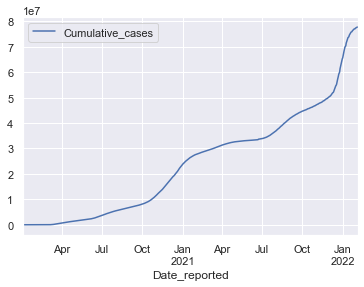

In [19]:
usa.plot.line(x='Date_reported', y='Cumulative_cases')

## Visualization 2: How new cases were effected after the first vaccinations were released 
By William Kopec

What I did in this visualization was to take 2 different countries (of similar population/size), one which had gotten vaccines and another one that hasn't. After checking the unvaxxed and vaxxed tables, I decided to compare Japan and Russia, which have about a 20 million difference in populations. I then plotted the amount of new cases 6 months before and after the first vaccination date of the vaccinated country to show a comparison on how vaccinated countries' cases differ from the unvaccinated one.

In [20]:
import datetime

vaxxedCountries = first_vaccine_dates[np.isnat(first_vaccine_dates.FIRST_VACCINE_DATE) == False]
unvaxxedCountries = first_vaccine_dates[np.isnat(first_vaccine_dates.FIRST_VACCINE_DATE) == True]

#print(first_vaccine_dates[['COUNTRY','FIRST_VACCINE_DATE']].loc[first_vaccine_dates['COUNTRY'] == 'United States of America'])
#2 vaccinated Countries
subData1 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'Italy'])
subData2 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'Hungary'])
#2 Unvaccinated Countries
subData3 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'Russian Federation'])
subData4 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'Japan'])

first_vax_date = pd.to_datetime(first_vaccine_dates['FIRST_VACCINE_DATE'].loc[first_vaccine_dates['COUNTRY'] == 'Japan'].values)
#print(first_vax_date)
#subData1['Date_reported']=pd.date_range(start='10/15/2020',end='2/12/2020',freq='D')
subData1['Date_reported'] = pd.to_datetime(subData1['Date_reported'])
subData2['Date_reported'] = pd.to_datetime(subData2['Date_reported'])
subData3['Date_reported'] = pd.to_datetime(subData3['Date_reported'])
subData4['Date_reported'] = pd.to_datetime(subData4['Date_reported'])

start_date = '2020-10-17'
end_date = '2021-10-17'

mask1 = (subData1['Date_reported'] > start_date) & (subData1['Date_reported'] <= end_date)
mask2 = (subData2['Date_reported'] > start_date) & (subData2['Date_reported'] <= end_date)
mask3 = (subData3['Date_reported'] > start_date) & (subData3['Date_reported'] <= end_date)
mask4 = (subData4['Date_reported'] > start_date) & (subData4['Date_reported'] <= end_date)

subData1 = subData1[mask1]
subData2 = subData2[mask2]
subData3 = subData3[mask3]
subData4 = subData4[mask4]

#print(subData4)

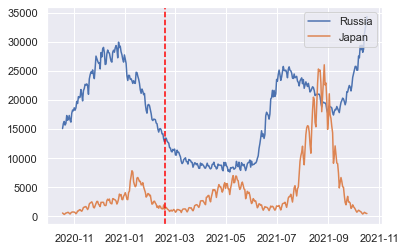

In [21]:
import seaborn as sns

fig = plt.figure()

for frame in [subData3, subData4]:
    plt.plot(frame['Date_reported'], frame['New_cases'])
#Get the first vaccination date for USA

#plot the first vaccination date on the graph
plt.axvline(first_vax_date, color="red", linestyle="--")
plt.legend(["Russia", "Japan"], loc ="upper right")
plt.show()

As shown in the plot, Japan got their first vaccines on 02-17-2021 and Russia did not get their first vaccines. From this plot, we can see that Japan (the vaccinated country) had consolidated in new cases at about 7,500 before having a drastic increase and drastic decrease shortly after. Russia had slight decreases but ended up with record-breaking new cases at the end, whereas Japan had near record-breaking low cases at the end. This shows that vaccines may have an effect on decreasing new cases in the long-term.

## Visualization : The total number of cases and deaths in various WHO Regions
By Chinmay Wadnerkar

A dataframe had to be created using the relevant coulumns, which in this case are the WHO Regions, the cumulative cases and deaths. The dataframe is grouped on the regions and then converted to a longform format, making it easier for plotting.

In [22]:
import seaborn as sns
sns.set_theme()


region_and_cases = main[['WHO_REGION', 'Cumulative_cases', 'Cumulative_deaths']]
region_and_cases = region_and_cases.groupby(['WHO_REGION']).max().reset_index()

df = pd.melt(region_and_cases, id_vars="WHO_REGION", var_name = 'Cases_and_Deaths', value_name = 'Value')
#print(df)

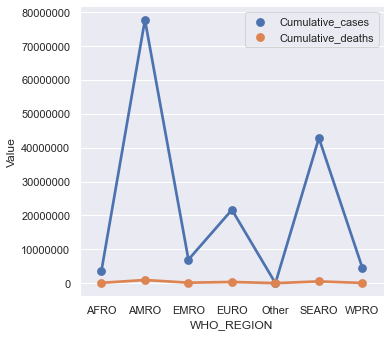

In [23]:
sns.catplot(data = df, x = "WHO_REGION", y = 'Value', hue = 'Cases_and_Deaths', ci = 'sd', kind = 'point', legend = False)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

The aim of this visulaization is to find if there are any inconsistencies in total number of cases and the total number of deaths in a region. From the point-plot it is easy to see that the regions with highest number of total reported cases have the highest total reported deaths. The only thing that is inconsistent is the __ratio of deaths to the total cases for AFRO region is twice as much as that for any other region__.

## Visualization
By Ian Lulu

I wanted to see how each region are doing on vaccinations, and how we can make a guess on how COVID is impacting these regions in the world. I am looking at the WHO_REGION and TOTAL_VACCINATIONS in the dataset.

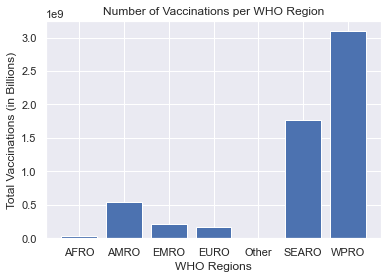

In [24]:
region_vax = main[['WHO_REGION', 'TOTAL_VACCINATIONS']]
region_vax = region_vax.groupby(['WHO_REGION']).max().reset_index()
#print(region_vax)

plt.bar(region_vax['WHO_REGION'], region_vax['TOTAL_VACCINATIONS'])
plt.title('Number of Vaccinations per WHO Region')
plt.xlabel('WHO Regions')
plt.ylabel('Total Vaccinations (in Billions)')
plt.show()

**Inference:**
From this visualization we see the distribution and difference of vaccinations in WHO regions. SEARO (South East Asia) and WPRO (Western Pacific) have the majority of vaccinations while AMRO (Americas), EMRO (Eastern Mediterranean), and EURO (Europe) are lagging behind. AFRO (African Region) has the least amount of vaccinations. From this, we can make a connection to how these various regions and countries are handling COVID cases.

## Machine Learning Analysis:

The aim of this ML Analysis is to perform a regression task on a subset of our main dataset. The subset includes the number of cases and deaths as reported by the the regions to WHO.

We will use the regression task to predict new cases based on the the older cases and other features of the dataset.

In [25]:
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = main[main.columns[0:7]]

target = df['New_deaths']


l = LabelEncoder()
df['WHO_REGION'] = l.fit_transform(df['WHO_REGION'])
new_df = df.drop(columns = ['New_deaths', 'COUNTRY', 'Date_reported'])
#new_df

C:\Users\William\AppData\Local\Temp/ipykernel_15548/2649080630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WHO_REGION'] = l.fit_transform(df['WHO_REGION'])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(new_df, target, test_size = 0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)


predict = reg.predict(X_test)
rmse = mean_squared_error(y_test, predict, squared = False)
mae = mean_absolute_error(y_test, predict)

print("The mean absolute error is", mae)
print('The root mean squred error is', rmse)

The mean absolute error is 27.744166080737553
The root mean squred error is 123.13318668076514


As we see for liner regression task the mean absolute error gives a lower value than root mean squared error and thus it is a better metric for this task.

For future Machine Learning tasks we will work with the full dataset and try to find the if we can accuractely predict the new deaths when the number of vaccinations are taken into account. We would also like to have a classification task that can help us classify the types of vaccines given in a particular region.